Sample result shape: (5000, 16, 3, 64, 64)
Number of epochs: 5000
Samples per epoch: 16
Animation will show 26 frames from epochs: [1, 201, 401, 601, 801]...[4201, 4401, 4601, 4801, 5000]


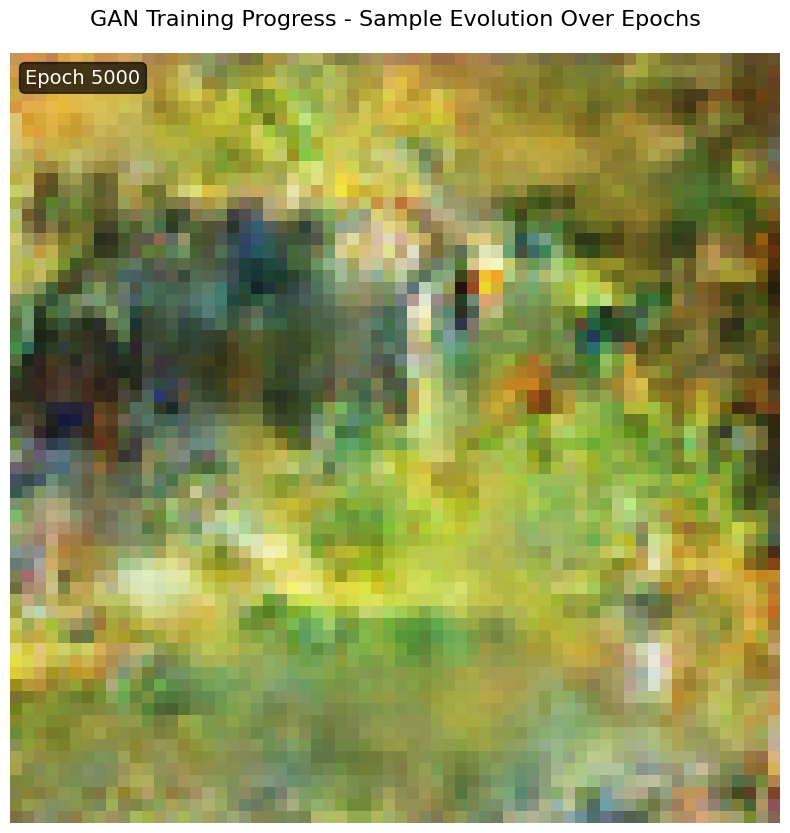

In [18]:
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt

# Load the samples
run_name = "samples_stilted-elevator-52"
img_list = np.load(f"./artifacts/{run_name}.npy")

print(f"Sample result shape: {img_list.shape}")
print(f"Number of epochs: {img_list.shape[0]}")
print(f"Samples per epoch: {img_list.shape[1]}")

# Animation configuration
ANIMATION_EPOCH_STEP = 200  # Show every X epochs (adjust as needed)

# Create animation showing evolution of first sample over epochs
fig = plt.figure(figsize=(10, 10))
plt.axis("off")
plt.title("GAN Training Progress - Sample Evolution Over Epochs", fontsize=16, pad=20)

ims = []
selected_epochs = []

for epoch_idx, epoch_samples in enumerate(img_list):
    # Only include every ANIMATION_EPOCH_STEP epochs, plus the first and last
    if (epoch_idx % ANIMATION_EPOCH_STEP == 0 or 
        epoch_idx == 0 or 
        epoch_idx == len(img_list) - 1):
        
        # Take first sample from each epoch for animation
        sample = epoch_samples[0]  # Shape: (3, 64, 64)
        
        # Convert from (C, H, W) to (H, W, C) for matplotlib
        img_transposed = np.transpose(sample, (1, 2, 0))
        
        # Denormalize from [-1, 1] to [0, 1] for display
        img_normalized = (img_transposed + 1.0) / 2.0
        img_normalized = np.clip(img_normalized, 0, 1)
        
        # Create the plot for this frame with epoch label
        im = plt.imshow(img_normalized, animated=True)
        text = plt.text(0.02, 0.98, f'Epoch {epoch_idx + 1}', 
                       transform=plt.gca().transAxes, 
                       fontsize=14, color='white', 
                       bbox=dict(boxstyle='round', facecolor='black', alpha=0.7),
                       verticalalignment='top')
        ims.append([im, text])
        selected_epochs.append(epoch_idx + 1)

print(f"Animation will show {len(selected_epochs)} frames from epochs: {selected_epochs[:5]}...{selected_epochs[-5:] if len(selected_epochs) > 10 else selected_epochs}")

# Create animation
ani = animation.ArtistAnimation(
    fig, ims, interval=500, repeat_delay=2000, blit=True
)
ani.save("animation.gif", writer="pillow", fps=2)

# Display the animation
HTML(ani.to_jshtml())